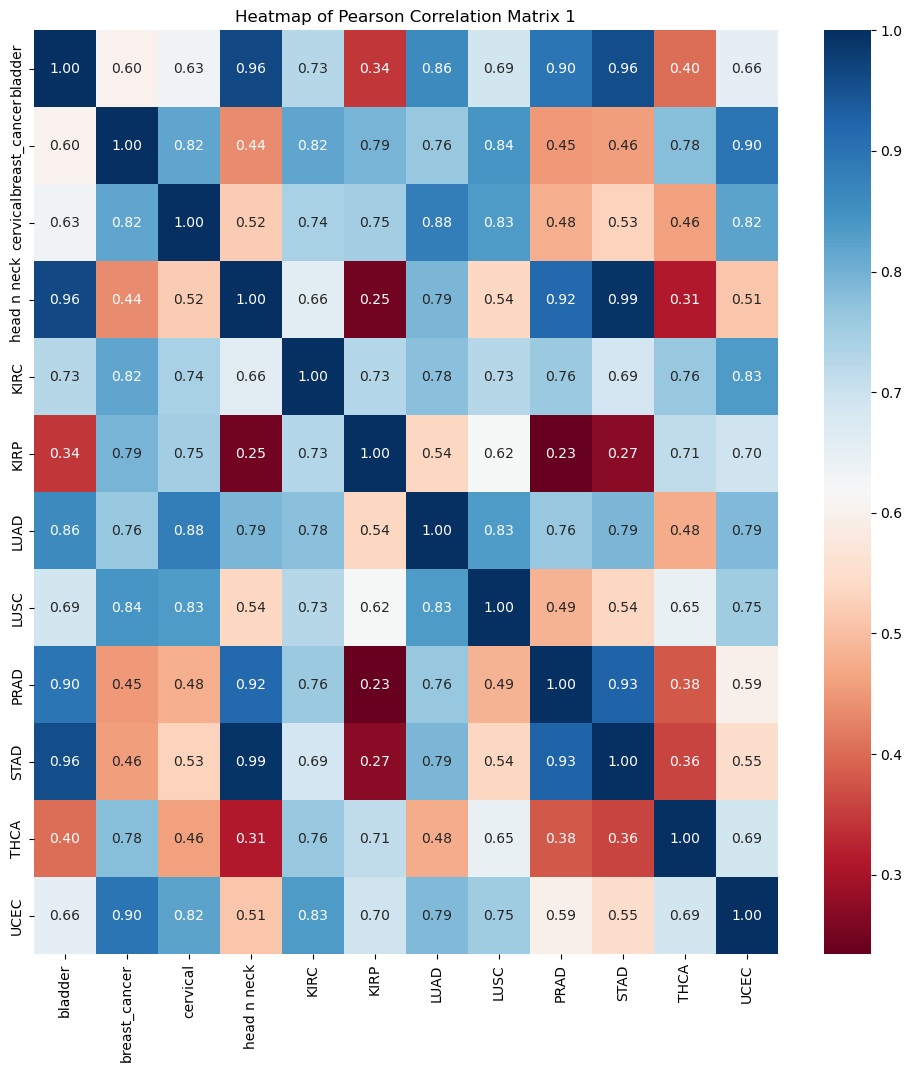

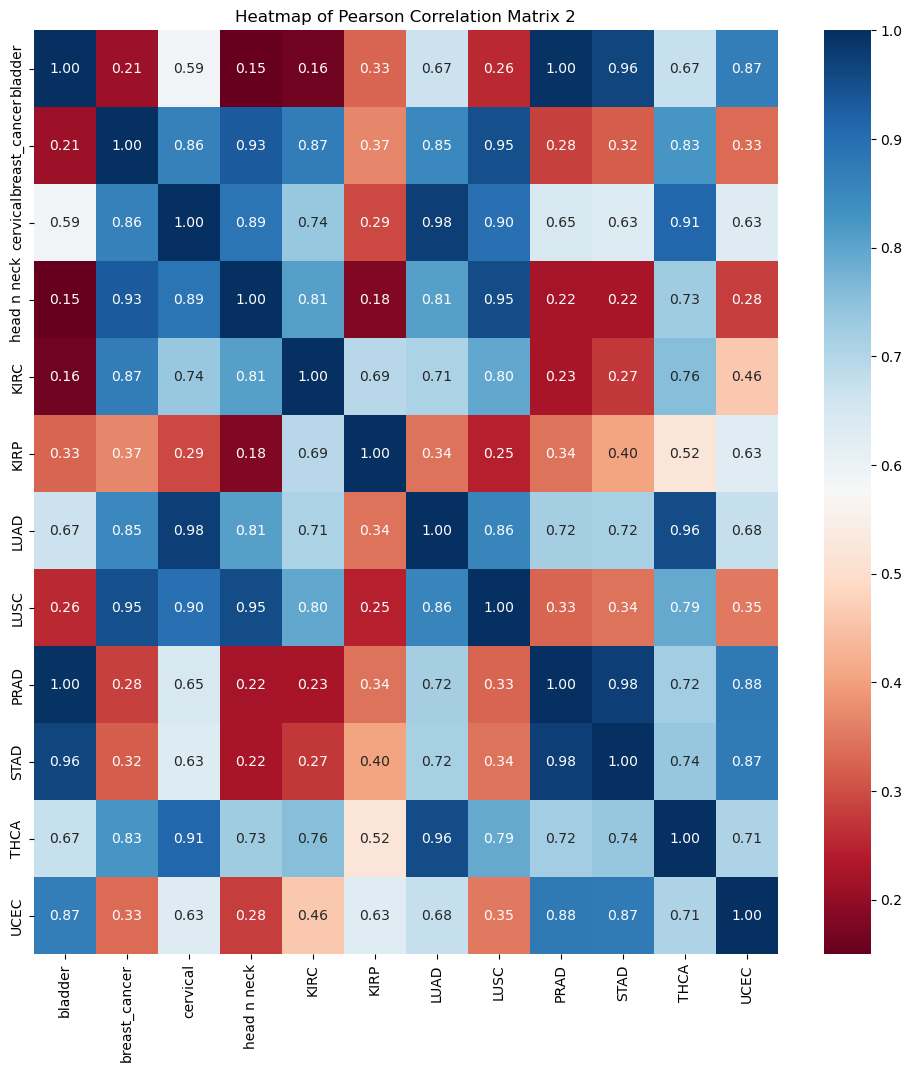

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the data
matrix1 = "/Users/pradeepchowdary/Desktop/Hightroughput/matrix1.txt"
matrix2 = "/Users/pradeepchowdary/Desktop/Hightroughput/matrix2.txt"

# Read the data
matrix1_data = pd.read_csv(matrix1, sep='\t', index_col=0)
matrix2_data = pd.read_csv(matrix2, sep='\t', index_col=0)

# Drop the columns that don't contain cancer data
matrix1_data = matrix1_data.iloc[:, :-1]
matrix2_data = matrix2_data.iloc[:, :-1]

# correlation matrix
correlation_matrix1 = matrix1_data.corr()
correlation_matrix2 = matrix2_data.corr()

# Heatmaps of correlation
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='RdBu')
plt.title('Heatmap of Pearson Correlation Matrix 1')
plt.show()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='RdBu')
plt.title('Heatmap of Pearson Correlation Matrix 2')
plt.show()

# Correlation between each cancer type across the two matrices
correlation_between_matrices = {}
for column in matrix1_data.columns:
    correlation = matrix1_data[column].corr(matrix2_data[column], method='pearson')
    correlation_between_matrices[column] = correlation

cancer_specific_correlations = pd.DataFrame(list(correlation_between_matrices.items()), columns=['Cancer Type', 'Correlation'])

# Overall correlation between the two data matrices
overall_correlation = np.corrcoef(matrix1_data.values.flatten(), matrix2_data.values.flatten())[0, 1]

# Append the overall correlation to the DataFrame
overall_correlation_row = pd.DataFrame([['Overall', overall_correlation]], columns=['Cancer Type', 'Correlation'])
cancer_specific_correlations = pd.concat([cancer_specific_correlations, overall_correlation_row], ignore_index=True)

# Save combined cancer-specific and overall correlations to CSV
cancer_specific_correlations.to_csv('correlations_data.csv', index=False)
